In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn

In [2]:
df = pd.read_csv('dog_rates_tweets.csv', parse_dates=['created_at'])

In [3]:
# Extract rating
temp = df['text'].str.extract(r'(\d+(\.\d+)?)/10')
df['rating'] = temp[0].astype(float) # Turn into float

# Remove NaN
df = df.dropna()

# Remove ratings greater or equal to 25
df = df[df['rating'] <= 25]

df

,id,created_at,text,rating
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0
...,...,...,...,...
7363,1032725635888803841,2018-08-23 20:25:53,This is Noodles. He had brain surgery earlier ...,14.0
7369,1032310288652152832,2018-08-22 16:55:26,This is Pingo and Nina. They are believed to b...,14.0
7381,1031696422813544448,2018-08-21 00:16:09,This is Nikita. She got caught in some wild fl...,13.0
7431,1029767403545288706,2018-08-15 16:30:55,This is Winston. He came home for the first ti...,14.0


In [4]:
def to_timestamp(d):
    return(d.timestamp())

df['timestamp'] = df['created_at'].apply(to_timestamp)

In [5]:
fit = stats.linregress(df['timestamp'], df['rating'])

In [6]:
df['prediction'] = df['timestamp']*fit.slope + fit.intercept
df

,id,created_at,text,rating,timestamp,prediction
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525910e+09,13.185763
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525797e+09,13.181785
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0,1.525735e+09,13.179609
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525394e+09,13.167614
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525285e+09,13.163804
...,...,...,...,...,...,...
7363,1032725635888803841,2018-08-23 20:25:53,This is Noodles. He had brain surgery earlier ...,14.0,1.535056e+09,13.507338
7369,1032310288652152832,2018-08-22 16:55:26,This is Pingo and Nina. They are believed to b...,14.0,1.534957e+09,13.503856
7381,1031696422813544448,2018-08-21 00:16:09,This is Nikita. She got caught in some wild fl...,13.0,1.534811e+09,13.498710
7431,1029767403545288706,2018-08-15 16:30:55,This is Winston. He came home for the first ti...,14.0,1.534351e+09,13.482540


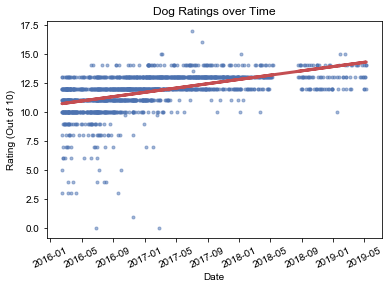

In [8]:
plt.xticks(rotation=25)
plt.xlabel("Date")
plt.ylabel("Rating (Out of 10)")
plt.title("Dog Ratings over Time")
plt.plot(df['created_at'], df['rating'], 'b.', alpha=0.5)
plt.plot(df['created_at'], df['prediction'], 'r-', linewidth=3)
seaborn.set()